In [1]:
#import libraries
import numpy as np
import pandas as pd
import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [4]:
white_wine_data = pd.read_csv('https://raw.githubusercontent.com/btkhimsar/DataSets/master/winequality-white.csv',sep=";")

In [5]:
#Reading the data
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
#knowing the dataset has howmuch columns and rows
white_wine_data.shape

(4898, 12)

In [10]:
#Describing the data
white_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
white_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
#improving the dataset
white_wine_data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [14]:
white_wine_data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [18]:
white_wine_data.rename(columns= {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
      'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',})

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [19]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [20]:
#Training,Testing the data
import matplotlib.pyplot as plt
import seaborn as sns
y = white_wine_data['quality']
X = white_wine_data.drop(white_wine_data['quality'],inplace= True)

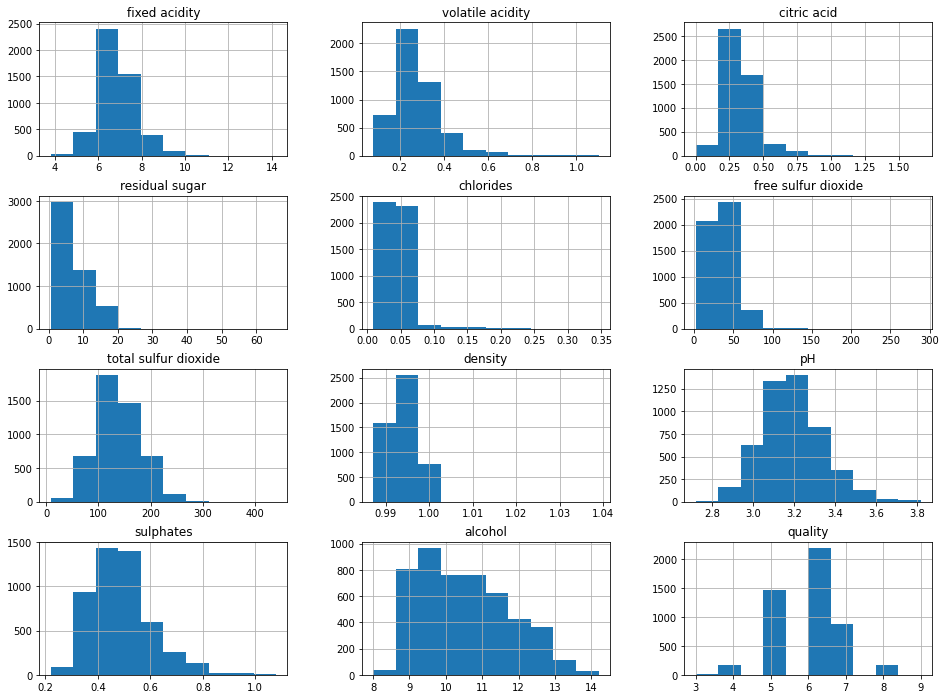

In [22]:
white_wine_data.hist(bins=10,figsize=(16,12))
plt.show()

In [24]:
white_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022366,0.288829,0.089149,0.022989,-0.049570,0.091279,0.265445,-0.426286,-0.016802,-0.121114,-0.113802
volatile acidity,-0.022366,1.000000,-0.149342,0.064405,0.070619,-0.096878,0.089528,0.027241,-0.031950,-0.035923,0.067778,-0.194719
citric acid,0.288829,-0.149342,1.000000,0.094425,0.114417,0.094170,0.121370,0.149626,-0.163895,0.062393,-0.075983,-0.009210
residual sugar,0.089149,0.064405,0.094425,1.000000,0.088717,0.298749,0.401353,0.838904,-0.193489,-0.026417,-0.450448,-0.097735
chlorides,0.022989,0.070619,0.114417,0.088717,1.000000,0.101321,0.198795,0.257276,-0.090517,0.016955,-0.360216,-0.209989
free sulfur dioxide,-0.049570,-0.096878,0.094170,0.298749,0.101321,1.000000,0.615436,0.294107,-0.000242,0.059440,-0.250230,0.008171
total sulfur dioxide,0.091279,0.089528,0.121370,0.401353,0.198795,0.615436,1.000000,0.529914,0.002633,0.134951,-0.448902,-0.174857
density,0.265445,0.027241,0.149626,0.838904,0.257276,0.294107,0.529914,1.000000,-0.093109,0.074926,-0.780102,-0.307434
pH,-0.426286,-0.031950,-0.163895,-0.193489,-0.090517,-0.000242,0.002633,-0.093109,1.000000,0.155987,0.121290,0.099449
sulphates,-0.016802,-0.035923,0.062393,-0.026417,0.016955,0.059440,0.134951,0.074926,0.155987,1.000000,-0.017731,0.053769


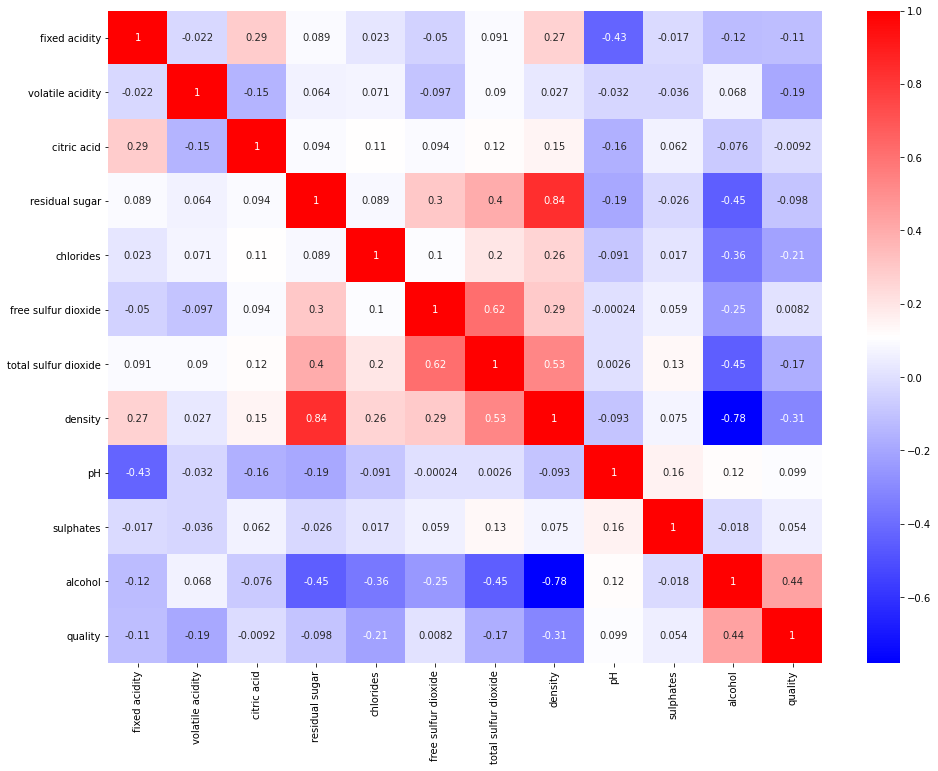

In [25]:
plt.figure(figsize=(16,12))
sns.heatmap(white_wine_data.corr(),cmap='bwr',annot=True)

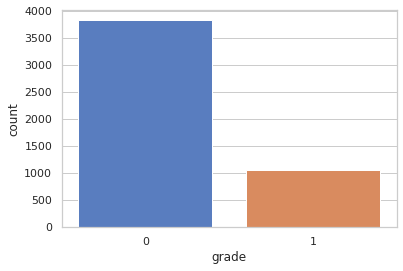

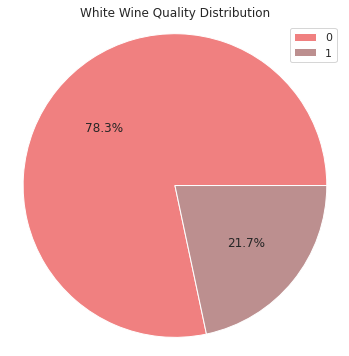

The amount of good quality white wine is  21.7 %.
mean white wine quality =  5.877734614598242


In [26]:
#Grouping the wine based on grade
# Defining 'grade' of wine

#Good wine
white_wine_data['grade'] = 1 

#Bad wine
white_wine_data.grade[white_wine_data.quality < 6.5] = 0 

sns.set(style="whitegrid")
p = sns.countplot(data=white_wine_data, x='grade', palette='muted')

#set plotsize and colors
plt.figure(figsize = (6,6))
colors = ['lightcoral', 'rosybrown']

labels = white_wine_data.grade.value_counts().index
plt.pie(white_wine_data.grade.value_counts(), autopct='%1.1f%%',colors=colors)
plt.legend(labels, loc="Best")
plt.axis('equal')
plt.title('White Wine Quality Distribution')
plt.show()
#Show mean quality of white wine and quality distribution

print('The amount of good quality white wine is ',round(white_wine_data.grade.value_counts(normalize=True)[1]*100,1),'%.')
print("mean white wine quality = ",white_wine_data["quality"].mean())

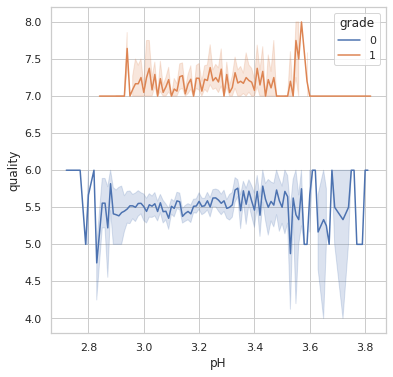

In [27]:
# plot to see how pH is varying in the grade of white wine

plt.figure(figsize=(6,6))
ax = sns.lineplot(x="pH", y="quality", hue="grade", data=white_wine_data,markers=True)

In [29]:
white_wine_data['grade'].value_counts() #prints counts of good and bad white wine

0    3831
1    1060
Name: grade, dtype: int64

In [30]:
#Checking once more for column names
white_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'grade'],
      dtype='object')

In [32]:
#Defining X and y
X = white_wine_data.drop(['quality'], axis=1)
y = white_wine_data['quality']

In [52]:
# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=100) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (3912, 12)
y_train: (3912,)
X_test: (979, 12)
y_test: (979,)


In [55]:
# 1. Using Random Forest Classifier

# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=3, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Random Forest Classifier Accuracy: 79.46884576098059 %
